# Task 2 : Building the baseline model

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Dropout, Input, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt
from funcs_Task1 import training_data_Pipeline, test_validation_data_Pipeline

In [3]:
# constants
img_height = img_width = 128
batch_size = 128
img_size = (img_height, img_width)

train_dir = 'covid xray/train'
val_dir = 'covid xray/val'
test_dir = 'covid xray/test'

epochs = 30

### 1. Set up the classification

In [4]:

# Set random seeds for reproducibility
np.random.seed(123)  
tf.random.set_seed(123) 

# evaluation metrics
METRICS = ["accuracy"]

### 2. Build initial model


In [5]:
# Step 2: Build Initial Model
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

# Convolutional Part
model.add(layers.Input(shape=(128, 128, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # First conv layer
model.add(layers.MaxPooling2D(2, 2))                          # Pooling
model.add(layers.BatchNormalization())                        # Normalization
model.add(layers.Conv2D(64, (3, 3), activation='relu'))      # Second conv layer
model.add(layers.MaxPooling2D(2, 2))                          # Pooling

# Fully Connected Part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))          # Dense layer
model.add(layers.Dropout(0.5))                                # Dropout layer

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))             # Binary classification

# Compile model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=METRICS)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,049 (14.14 MB)

 Trainable params: 3,705,985 (14.14 MB)

 Non-trainable params: 64 (256.00 B)

### 3. Train your model

In [6]:
# Use existing data pipelines
train_data_gen = training_data_Pipeline(batch_size, img_size, train_dir)
val_data_gen = test_validation_data_Pipeline(batch_size, img_size, test_dir=val_dir, train_dir=train_dir)

# Get sample counts (if not already defined)
total_train = train_data_gen.samples
total_val = val_data_gen.samples

# Compile the model (keep your existing METRICS)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
   metrics=METRICS
)

# Train the model
history = model.fit(
    train_data_gen,
    batch_size=batch_size,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/30


c:\Users\Marcin\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5129 - loss: 4.9017 - val_accuracy: 0.5000 - val_loss: 0.7034
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6250 - loss: 0.6891 - val_accuracy: 0.5625 - val_loss: 0.6943
Epoch 3/30


c:\Users\Marcin\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5255 - loss: 0.6856 - val_accuracy: 0.5469 - val_loss: 0.6927
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6797 - loss: 0.6372 - val_accuracy: 0.3750 - val_loss: 0.6932
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6414 - loss: 0.6435 - val_accuracy: 0.5104 - val_loss: 0.6929
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7344 - loss: 0.6030 - val_accuracy: 0.4375 - val_loss: 0.6927
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6851 - loss: 0.6301 - val_accuracy: 0.5573 - val_loss: 0.6887
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6797 - loss: 0.6412 - val_accuracy: 0.7500 - val_loss: 0.6716
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7237 - loss: 0.6134 - val_accuracy: 0.5859 - val_loss: 0.6775
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6797 - loss: 0.6250 - val_accuracy: 0.7500 - val_loss: 0.6325
Ep

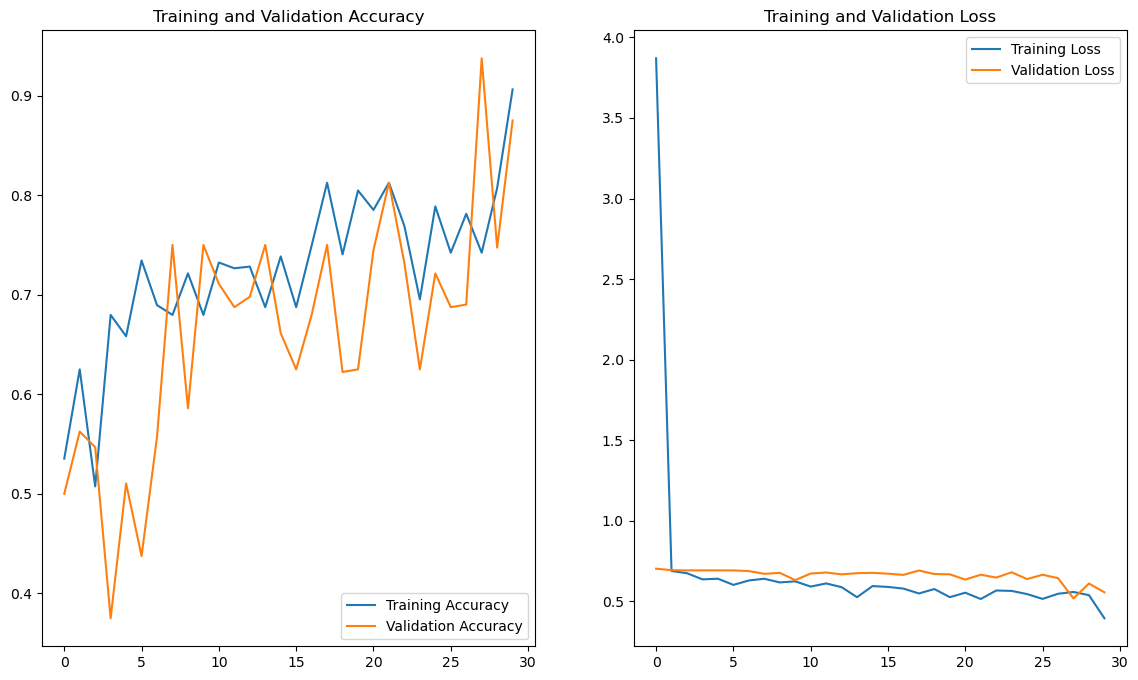

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 4. Hyperparameter tuning

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
from tensorflow.keras import layers, models, optimizers
import keras_tuner as kt

def build_model(hp):

    # Tune number of filters
    filters = hp.Choice('filters', [32, 64])

    # Tune dropout rate
    dropout_rate = hp.Choice('dropout_rate', [0.3, 0.2])

    # Tune learning rate
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4])

    # Tune optimizer
    optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd'])

    new_model = models.Sequential()

    # Convolutional Part
    new_model.add(layers.Input(shape=(128, 128, 3)))
    new_model.add(layers.Conv2D(filters, (3, 3), activation='relu'))
    new_model.add(layers.MaxPooling2D(2, 2))
    new_model.add(layers.BatchNormalization())
    new_model.add(layers.Conv2D(filters, (3, 3), activation='relu'))
    new_model.add(layers.MaxPooling2D(2, 2))

    # Fully Connected Part
    new_model.add(layers.Flatten())
    new_model.add(layers.Dense(64, activation='relu'))
    new_model.add(layers.Dropout(dropout_rate))

    # Output layer
    new_model.add(layers.Dense(1, activation='sigmoid'))

    # Compile with chosen optimizer and learning rate
    if optimizer_choice == 'adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = optimizers.SGD(learning_rate=learning_rate)

    new_model.compile(optimizer=optimizer,
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    return new_model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='kt_dir_task2',
    project_name='cnn_tuning_task2'
)

tuner.search(
    train_data_gen,
    epochs=5,
    validation_data=val_data_gen,
    steps_per_epoch=total_train // batch_size,
    validation_steps=total_val // batch_size,
    callbacks=[early_stop]
)


Trial 8 Complete [00h 00m 47s]
val_accuracy: 0.6875

Best val_accuracy So Far: 0.7213541865348816
Total elapsed time: 00h 07m 17s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
64                |64                |filters
0.2               |0.3               |dropout_rate
0.001             |0.0001            |learning_rate
sgd               |adam              |optimizer

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5686 - loss: 0.7599 - val_accuracy: 0.6224 - val_loss: 0.6718
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7422 - loss: 0.5746 - val_accuracy: 0.6875 - val_loss: 0.6398
Epoch 3/5
 9/12 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7296 - loss: 0.5427

In [100]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best filter count:", best_hp.get('filters'))
print("Best dropout rate:", best_hp.get('dropout_rate'))
print("Best learning rate:", best_hp.get('learning_rate'))
print("Best optimizer:", best_hp.get('optimizer'))

best_val_acc = tuner.get_best_models(1)[0].evaluate(val_data_gen, verbose=0)[1]

results.append({
        'batch_size': batch_size,
        'learning_rate': best_hp.get('learning_rate'),
        'dropout_rate': best_hp.get('dropout_rate'),
        'val_accuracy': best_val_acc
    })

df = pd.DataFrame(results)
df.to_csv("hyperparameter_tuning_task2.csv", index=False)

Best filter count: 32
Best dropout rate: 0.3
Best learning rate: 0.001
Best optimizer: sgd


### 5. final baseline

In [109]:
full_data_gen = training_data_Pipeline(128, img_size, 'covid xray/train_val')

learning_rate = 0.001
dropout_rate = 0.3
filters = 32
optimizer = 'sgd'

final_model = models.Sequential()

# Convolutional Part
final_model.add(layers.Input(shape=(128, 128, 3)))
final_model.add(layers.Conv2D(filters, (3, 3), activation='relu'))  # First conv layer
final_model.add(layers.MaxPooling2D(2, 2))                          # Pooling
final_model.add(layers.BatchNormalization())                        # Normalization
final_model.add(layers.Conv2D(filters, (3, 3), activation='relu'))      # Second conv layer
final_model.add(layers.MaxPooling2D(2, 2))                          # Pooling

# Fully Connected Part
final_model.add(layers.Flatten())
final_model.add(layers.Dense(64, activation='relu'))          # Dense layer
final_model.add(layers.Dropout(dropout_rate))                                # Dropout layer

# Output layer
final_model.add(layers.Dense(1, activation='sigmoid'))             # Binary classification

optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
final_model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(), metrics=METRICS)

history = model.fit(
    full_data_gen,
    batch_size=batch_size,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30


c:\Users\Marcin\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/50 ━━━━━━━━━━━━━━━━━━━━ 30s 909ms/step - accuracy: 0.7536 - loss: 0.4560

c:\Users\Marcin\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.7614 - loss: 0.4443 - val_accuracy: 0.8375 - val_loss: 0.3489
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step - accuracy: 0.7692 - loss: 0.4319 - val_accuracy: 0.8450 - val_loss: 0.3444
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 288ms/step - accuracy: 0.7700 - loss: 0.4273 - val_accuracy: 0.8325 - val_loss: 0.3537
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 291ms/step - accuracy: 0.7500 - loss: 0.4408 - val_accuracy: 0.8475 - val_loss: 0.3285
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - accuracy: 0.7687 - loss: 0.4344 - val_accuracy: 0.8125 - val_loss: 0.3663
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step - accuracy: 0.7532 - loss: 0.4441 - val_accuracy: 0.8300 - val_loss: 0.3751
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - accuracy: 0.7589 - loss: 0.4471 - val_accuracy: 0.8275 - val_loss: 0.3663
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.7693 - loss: 0.4292 - val_accuracy: 0.830

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


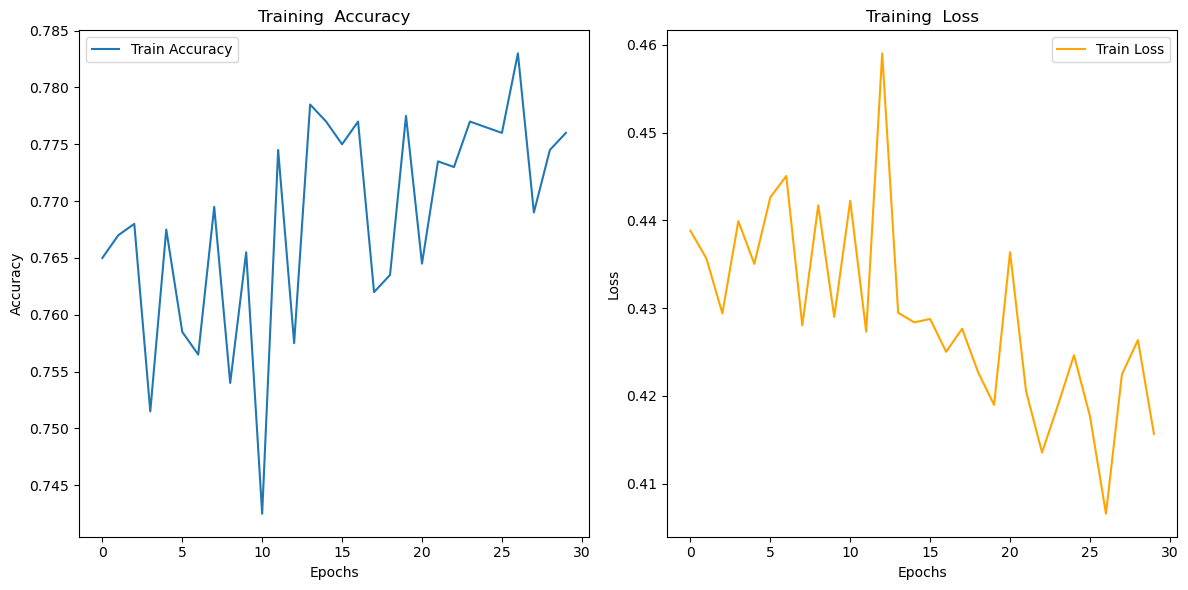

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5111 - loss: 0.6863 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
Test Loss: 0.6897
Test Accuracy: 0.5050


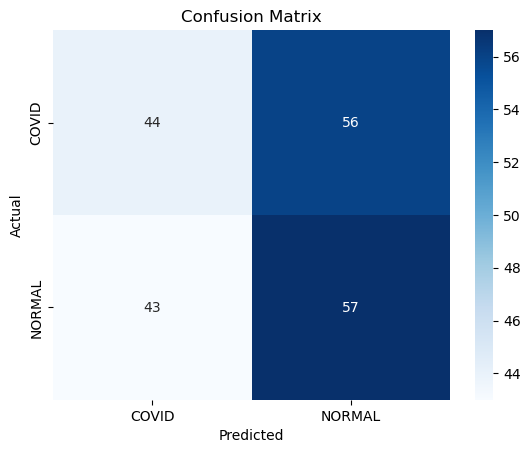

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_data_gen = test_validation_data_Pipeline(batch_size, img_size, 'covid xray/train_val', test_dir)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')

plt.title('Training  Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.title('Training  Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#Save the model to disk and load it back
final_model.save('covid_xray_model.h5')  # Save the model
loaded_model = tf.keras.models.load_model('covid_xray_model.h5')  # Load the model

test_data_gen = test_validation_data_Pipeline(batch_size, img_size, 'covid xray/train_val', test_dir)
loss, accuracy = loaded_model.evaluate(test_data_gen)

y_true = test_data_gen.classes
y_pred_probs = final_model.predict(test_data_gen)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data_gen.class_indices.keys(), yticklabels=test_data_gen.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

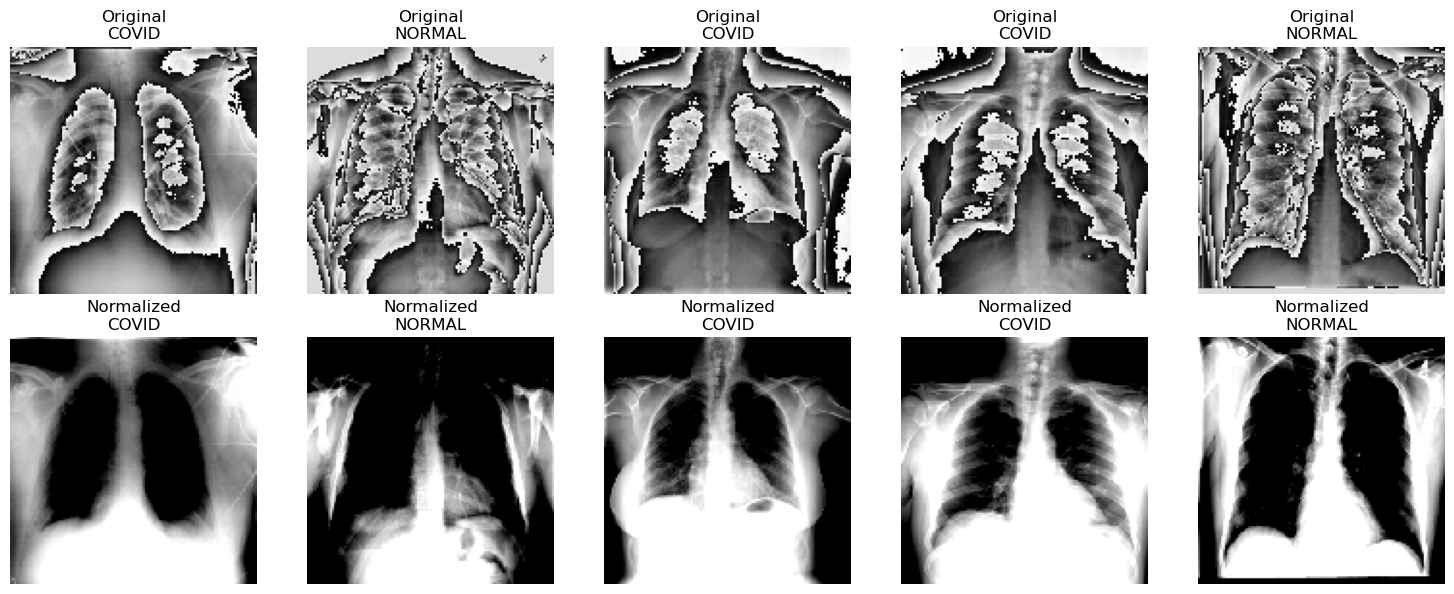

In [121]:
# Plot a few samples from the test dataset without normalization vs. after normalization

# Get batch and process
sample_images, sample_labels = next(iter(test_data_gen))
sample_labels = np.argmax(sample_labels, axis=1) if sample_labels.ndim > 1 else sample_labels.flatten().astype(int)
class_names = list(test_data_gen.class_indices.keys())

plt.figure(figsize=(15, 6))
for i, (img, label) in enumerate(zip(sample_images[:5], sample_labels[:5])):
    # Original (denormalized)
    plt.subplot(2, 5, i+1)
    plt.imshow((img*255).astype('uint8').squeeze(), cmap='gray')
    plt.title(f"Original\n{class_names[label]}"), plt.axis('off')
    
    # Normalized
    plt.subplot(2, 5, i+6)
    plt.imshow(img.squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title(f"Normalized\n{class_names[label]}"), plt.axis('off')

plt.tight_layout()
plt.show()